# Exploring Decision Trees

## 1. Problem Definition

Iris dataset is the Hello World for Data Science, so we will practice a ML algorithm on this famous dataset.

Iris dataset contains five columns such as Petal Length, Petal Width, Sepal Length, Sepal Width and Species Type. 
Iris is a flowering plant, the researchers have measured various features of the different iris flowers and recorded digitally. 

## 2. Importing Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn

## 3. Loading the dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/arditoibryan/pythonkai/main/ML_for_beginners/Project4_decision_tree_classifier/iris_dataset.csv')
df

,label,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,virginica,6.7,3.0,5.2,2.3
146,virginica,6.3,2.5,5.0,1.9
147,virginica,6.5,3.0,5.2,2.0
148,virginica,6.2,3.4,5.4,2.3


## 4. Cleaning the data

The dataset is perfect already, we do not need to preprocess it.

**Why is the iris dataset perfect for classification?**

Because all the features are very distinct from each other, and they do not overlap, so when the classification algorithm is trained, it won’t be unclear to assign some values to one or more labels.

The parallel coordinates graph can allow us to visualize every sample of the dataset by using parallel values on lines.

Check out the following code to visualize it.

>Don't forget to install plotly with 'pip install plotly' in the terminal.

In [3]:
#Parallel coordinates graph of the iris dataset features

import plotly.express as px

df_iris = px.data.iris()
fig = px.parallel_coordinates(df_iris, color="species_id", labels={"species_id": "Species",
                  "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
                  "petal_width": "Petal Width", "petal_length": "Petal Length", },
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()

The features belonging to each label are so different that we can even make a distinction with the human eye. If, for example, we had a new flower with a petal width of 2.5, we can immediately see from the graph that it belongs to species 3.

## 4. Separate label from features

In [4]:
X = df[list(df.columns[1:5])]
y = df[['label']]

In [ ]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
y.sample(5)

,label
104,virginica
147,virginica
30,setosa
85,versicolor
81,versicolor


## 5. Split the data into train and test

To measure the accuracy of our classification algorithm we will need to split the dataset into a test and train sample.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3, stratify=y)

## 6. Train the model

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9777777777777777

In [15]:
y_train.value_counts()

label     
setosa        35
versicolor    35
virginica     35
dtype: int64

Perfect! Our decision tree score has reached 97% accuracy! We used this dataset on purpose to confirm that data really makes the difference when creating a model. 

**How was the tree trained?**

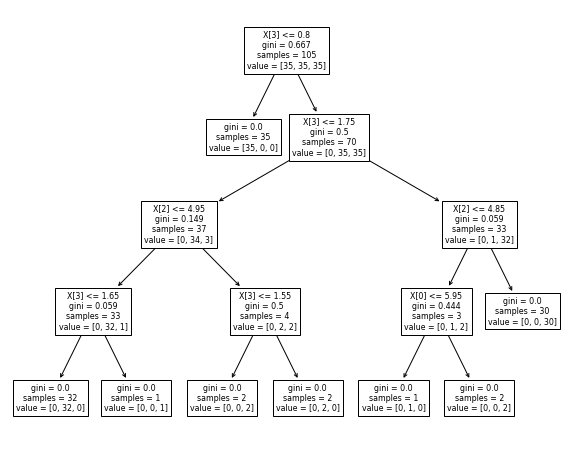

In [16]:
from sklearn import tree
from matplotlib import pyplot as plt

plt.figure(figsize=(10,8))
tree.plot_tree(clf)
plt.show()

## 7. Making predictions

We are going to compare the real (true) label from the ones we predicted to see if we find the error that made our accuracy be different from 100%. 

>We are only doing this visually because we have a small dataset.

In [17]:
#show predicted dataset
pd.concat([y_test.reset_index(drop=True), pd.DataFrame(clf.predict(X_test))], axis=1)

,label,0
0,virginica,virginica
1,virginica,virginica
2,setosa,setosa
3,setosa,setosa
4,versicolor,versicolor
5,setosa,setosa
6,versicolor,versicolor
7,virginica,virginica
8,setosa,setosa
9,versicolor,versicolor
